# WeRateDogs Tweets Analysis
## Created By: Harsh Navin Gupta

In [1]:
# Importing Libraries
import pandas as pd
import tweepy
import requests
import json
import numpy as np
from tqdm import tqdm

## Step 1: Data Gathering

### 1.1 Gathering Tweet Archive of WeRateDogs
The **Tweet Archive**, is read directly from a *CSV File*, and is treated as a On-Hand File.

In [2]:
# Reading Tweet Archive Data
tweet_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
tweet_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2 Gathering Tweet Dog Image Predictions
This data is gathered using **Requests** library, as this file is hosted on a Web Server.

In [4]:
image_pred_url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
# Downloading File using Requests Library
req = requests.get(image_pred_url)

# Saving Content of Downloaded File
with open('tweet_image_pred.tsv', 'wb') as pred:
    pred.write(req.content)

In [6]:
# Reading Image Predictions File
image_pred_df = pd.read_csv('tweet_image_pred.tsv', sep='\t')

In [7]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Gathering Additional Information About Tweets
The additional information about the tweets, is gathered using the **Tweepy API**.

In [8]:
consumer_key = 'XXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXX'

access_key = 'XXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXX'

In [9]:
# Performing Authorisation
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
# Extracting Tweet IDs from Tweet Archive DF
tweet_ids = tweet_archive_df['tweet_id'].values.tolist()

In [11]:
# Extracting Information About All Tweets And Storing Into Dataframe
tweets_add_info = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favourite_count'])
tweet_info_dict = {}
incorrect_tweet_ids = []

for i in tqdm(range(len(tweet_ids))):
    try:
        tweet = api.get_status(tweet_ids[i])
    except:
        # If Exception is Raised, it means that the Tweet ID is invalid
        incorrect_tweet_ids.append(tweet_ids[i])
        continue
        
    tweet_info_dict['tweet_id'] = tweet.id
    tweet_info_dict['retweet_count'] = tweet.retweet_count
    tweet_info_dict['favourite_count'] = tweet.favorite_count
    
    tweets_add_info = tweets_add_info.append(tweet_info_dict, ignore_index=True)
    tweet_info_dict = {}

100%|██████████████████████████████████████████████████████████████████████████████| 2356/2356 [37:22<00:00,  1.05it/s]


In [12]:
# Displaying Tweets Additional Info Dataframe
tweets_add_info.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7428,35151
1,892177421306343426,5521,30432
2,891815181378084864,3645,22889
3,891689557279858688,7590,38426
4,891327558926688256,8180,36694


In [13]:
# Saving Tweets Additional Info Dataframe to Disk
tweets_add_info.to_csv('tweets_add_info.csv', index=False)

## Step 2: Data Assessment
In this section, I will Visually and Programatically inspect all the dataframes to identify Data Quality and Tidiness issues.

### 2.1 Assessing Twitter Archive Data

In [14]:
tweet_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
tweet_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# Exploring Duplicated Rows In Dataframe based on Tweet ID
tweet_archive_df[tweet_archive_df.duplicated(['tweet_id'], keep='last')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


It can be observed that the Twitter Archive Dataframe does **NOT** contain any duplicated tweet entries. The duplicate entries were derived on the basis of the **Tweet ID**, which is a parameter that uniquely identifies all the tweets.

In [17]:
# Listing Tweets with Invalid Tweet ID
tweet_archive_df.loc[tweet_archive_df['tweet_id'].isin(incorrect_tweet_ids)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None


In [18]:
tweet_archive_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In the above cell, it can be observed that the names **a, by, the, an, all, just, very**, appear in the name column of the Tweet Archives. Although the names are strings are correct according to the domain rules, they are illogical to be considered as the names of pets, and thus maybe an error.

In [19]:
tweet_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


It can be observed from the above 5-Number Summary, that there is some incorrect values in Rating Numerator and Denominator, as the difference between 3rd Quartile and Maximum Value is very large.

In [20]:
tweet_archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
tweet_archive_df.loc[tweet_archive_df['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


Tweets with rating numerators = 420, 1776, 960, 666 on visiting these tweets, it can be observed that these tweets do not rate any dog, and hence should be removed.

In [22]:
tweet_archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
tweet_archive_df.loc[tweet_archive_df['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


- Tweet with denominator = 0, is a reply tweet.
- Tweet with numerator = 1, and denominator = 2, is an error, with actual numerator = 9, and denominator = 10.
- Tweet with numerator = 24, and denominator = 7, does not represent a rating, and thus is an errorneous rating, and should be removed.

### 2.2 Assessing Image Prediction Dataframe

In [24]:
image_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [25]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Data Quality Issues
- The datatype of Timestamp is incorrect, should be **datetime** datatype.
- Remove All Tweets from Tweet Archive Dataframe, which have incorrect Tweets IDs.
- Replace Missing Name values in **name** represented by *None* with NaN.
- Replace the illogical values **a, by, the, an, all, just, very** in the **name** column with NaN, to represent Invalid values.
- Replace Missing Values in *doggo, floofer, pupper and puppo* with NaN.
- Remove All Tweets which are **Retweets**.
- Remove All Tweets which are **Reply Tweets**.
- Remove All Tweets from Tweet Archive which do not have an image.
- Remove Tweets which have Numerators = 420, 1776, 960, 666, and Denominator = 7, as they are not rating tweets, and thus invalid.
- Incorrect Numerator and Denominator values in tweet with (1,2). Replace them by correct rating of (9,10).
- Extraction of Short URLs from Tweet *text* column, and placing into new column called *short_url*.

#### Data Tidniess Issues
- Melt the columns *doggo, floofer, pupper and puppo* into a single column.
- Multiple Columns in Image Prediciton dataframe, to represent the dog breed, change to representation in a single column.
- Merge the Tweet Archive, Image Prediction and Additional Information for every unique tweet into a single dataframe.

## Step 3. Data Cleaning
In this step, all the Data Quality and Tidiness which were identified during Data Assessment are corrected.

In [26]:
tweet_archive_clean = tweet_archive_df.copy()
image_pred_clean = image_pred_df.copy()
tweets_add_clean = tweets_add_info.copy()

### 3.1 Removal of All Retweets
- Definition<br>
Not all the tweets in the dataset are Rating Tweets, some of these tweets are also retweets, and thus are removed from the dataframe.
- Code

In [27]:
tweet_archive_clean = tweet_archive_clean.loc[tweet_archive_clean['retweeted_status_id'].isna()]

# Resetting Index
tweet_archive_clean.reset_index(inplace=True)
tweet_archive_clean.drop(['index'], axis=1, inplace=True)

- Test

In [28]:
print('Shape Before Removal of Retweets :',  tweet_archive_df.shape)
print('Shape After Removal of Retweets :', tweet_archive_clean.shape)

Shape Before Removal of Retweets : (2356, 17)
Shape After Removal of Retweets : (2175, 17)


### 3.2 Removal of All Reply Tweets
- Definition<br>
Not all the tweets in the dataset are Rating Tweets, some of these tweets are also replies to other tweets, and thus are removed from the dataframe.
- Code

In [29]:
tweet_archive_clean = tweet_archive_clean.loc[tweet_archive_clean['in_reply_to_status_id'].isna()]
tweet_archive_clean = tweet_archive_clean.loc[tweet_archive_clean['in_reply_to_user_id'].isna()]

# Resetting Index
tweet_archive_clean.reset_index(inplace=True)
tweet_archive_clean.drop(['index'], axis=1, inplace=True)

- Test

In [30]:
print('Shape Before Removal of Retweets & Reply Tweets:',  tweet_archive_df.shape)
print('Shape After Removal of Retweets & Reply Tweets:', tweet_archive_clean.shape)

Shape Before Removal of Retweets & Reply Tweets: (2356, 17)
Shape After Removal of Retweets & Reply Tweets: (2097, 17)


### 3.3 Removal of All Tweets with Invalid Tweet IDs
- Definition<br>
Some of the tweets in the Tweet Archive dataframe, do not have correct Tweet IDs which leads to failiure in extraction of additional information regarding the tweets, and thus, these tweets are removed from the archive dataframe.
- Code

In [31]:
print('Number of Tweets with Invalid Tweet IDs :', len(incorrect_tweet_ids))
print('Incorrect Tweet IDs')
print(incorrect_tweet_ids)

Number of Tweets with Invalid Tweet IDs : 25
Incorrect Tweet IDs
[888202515573088257, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 851953902622658560, 845459076796616705, 844704788403113984, 842892208864923648, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 775096608509886464, 771004394259247104, 770743923962707968, 759566828574212096, 754011816964026368, 680055455951884288]


In [32]:
# Removing Tweets with Incorrect Tweet IDs
tweet_archive_clean = tweet_archive_clean[~tweet_archive_clean.tweet_id.isin(incorrect_tweet_ids)]

# Resetting Index
tweet_archive_clean.reset_index(inplace=True)
tweet_archive_clean.drop(['index'], axis=1, inplace=True)

- Test

In [33]:
print('Shape after Removal of Incorrect Tweet IDs :', tweet_archive_clean.shape)

Shape after Removal of Incorrect Tweet IDs : (2090, 17)


### 3.4 Incorrect datatype of timestamp in Tweet Archive
- Definition<br>
The datatype of **timestamp** in the Tweet Archive is *object*, which is incorrect and should be changed to *datetime* using the *astype* function.
- Code

In [34]:
tweet_archive_clean['timestamp'] = tweet_archive_clean['timestamp'].astype('datetime64')

- Test<br>
As it can now be seen, the datatype of **timestamp** has been changed to *datetime64[ns]*

In [35]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 17 columns):
tweet_id                      2090 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2090 non-null datetime64[ns]
source                        2090 non-null object
text                          2090 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2087 non-null object
rating_numerator              2090 non-null int64
rating_denominator            2090 non-null int64
name                          2090 non-null object
doggo                         2090 non-null object
floofer                       2090 non-null object
pupper                        2090 non-null object
puppo                         2090 non-null object
dtypes: datetime64[ns](1), float

### 3.5 Replacing all Missing Name values with NaN
- Definition<br>
The Missing values in the **name** column in the Tweet Archive are represented using *None*, which is not a correct representation of missing values, and this value will be replaced with *NaN*, using the function **replace()**.
- Code

In [36]:
tweet_archive_clean['name'] = tweet_archive_clean['name'].replace(to_replace='None', value=np.nan)

- Test<br>
As it can be observed, the entries for the *None* value now do not appear in the value counts output.

In [37]:
tweet_archive_clean['name'].value_counts()

a               55
Charlie         10
Oliver          10
Cooper          10
Lucy            10
                ..
Kayla            1
Alexanderson     1
Luther           1
Sojourner        1
Kellogg          1
Name: name, Length: 952, dtype: int64

### 3.6 Replacing all Illogical Name values with NaN
- Definition<br>
Many values in the **name** column of the Tweet Archive contain the values **a, by, the, an, all, just, very**. Although these values satisfy the domain constraints, these are illogical values to be names of dogs, and thus are replaced by NaN to indicate Invalid Data
- Code

In [38]:
tweet_archive_clean['name'] = tweet_archive_clean['name'].replace(to_replace=['a', 'by', 'the', 'an', 'all', 'just', 'very'], value=np.nan)

- Test<br>
It can be observed all the Illogical Name entries were replaced by NaNs, and are no longer contained in the **name** column.

In [39]:
['a', 'by', 'the', 'an', 'all', 'just', 'very'] in tweet_archive_clean['name'].unique().tolist()

False

### 3.7 Replacing Missing Values in doggo, floofer, pupper and puppo Columns with NaN
- Definition
The columns **doggo, floofer, pupper and puppo** represent missing values using *None*, which is not a standard representation of missing values, and these values are replaced with NaN using **replace()** function.
- Code

In [40]:
tweet_archive_clean['doggo'] = tweet_archive_clean['doggo'].replace(to_replace='None', value=np.nan)
tweet_archive_clean['floofer'] = tweet_archive_clean['floofer'].replace(to_replace='None', value=np.nan)
tweet_archive_clean['pupper'] = tweet_archive_clean['pupper'].replace(to_replace='None', value=np.nan)
tweet_archive_clean['puppo'] = tweet_archive_clean['puppo'].replace(to_replace='None', value=np.nan)

### 3.8 Removal of Tweets which have Numerators = 420, 1776, 960, 666, and Denominator = 7
- Definition<br>
Remove Tweets which have Numerators = 420, 1776, 960, 666, and Denominator = 7, as they are not rating tweets, and thus invalid.
- Code

In [41]:
# Removal of Tweets with Numerators = 420, 1776, 960, 666
num_list = [420, 1776, 960, 666]
tweet_archive_clean = tweet_archive_clean[~tweet_archive_clean.rating_numerator.isin(num_list)]
# Removal of Tweets with Denominators = 7
denom_list = [7]
tweet_archive_clean = tweet_archive_clean[~tweet_archive_clean.rating_denominator.isin(denom_list)]

# Resetting Index
tweet_archive_clean.reset_index(inplace=True)
tweet_archive_clean.drop(['index'], axis=1, inplace=True)

- Test

In [42]:
print('Shape of Twitter Archive after Removal :', tweet_archive_clean.shape)
print(num_list in tweet_archive_clean['rating_numerator'].values.tolist())
print(denom_list in tweet_archive_clean['rating_denominator'].values.tolist())

Shape of Twitter Archive after Removal : (2087, 17)
False
False


### 3.9 Correction of Numerator & Denominator to 9,10 from 1,2
- Definition<br>
The tweet with Numerator = 1 and Denominator = 2, is an errorneous entry, with the actual values being Numerator = 9, and Denominator = 10
- Code

In [43]:
tweet_iden = 666287406224695296
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == tweet_iden, 'rating_numerator'] = 9
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == tweet_iden, 'rating_denominator'] = 10

- Test

In [44]:
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == tweet_iden]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2066,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,NaN,NaN,NaN,NaN,NaN


### 3.10 Removal of All Tweets that Do Not have an Image
- Definition<br>
Some tweets in the Tweet Archive do not contain images, and thus cannot be rating tweets, and are removed from the tweet archive.
- Code

In [45]:
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.tweet_id.isin(image_pred_df.tweet_id.values.tolist())]

# Resetting Index
tweet_archive_clean.reset_index(inplace=True)
tweet_archive_clean.drop(['index'], axis=1, inplace=True)

- Test

In [46]:
print('Shape After Removal:', tweet_archive_clean.shape)

Shape After Removal: (1961, 17)


### 3.11 Extraction of Short URLs from Tweet
- Definition<br>
Extraction of Short URLs from Tweet *text* column, and placing into new column called *short_url*.
- Code

In [47]:
import re
# Defining Function to Return Separated Text and Short URL
def return_text_url(df_row):
    text = df_row['text']
    split_text = re.split("https", text)
    return split_text[0], 'https' + split_text[1]

In [48]:
# Applying Function to All Rows in the Dataframe
text_list = []
short_url_list = []

for i in tqdm(range(0, tweet_archive_clean.shape[0])):
    row = tweet_archive_clean.loc[i]
    text_val, url_val = return_text_url(row)
    text_list.append(text_val)
    short_url_list.append(url_val)

100%|████████████████████████████████████████████████████████████████████████████| 1961/1961 [00:00<00:00, 4977.86it/s]


In [49]:
# Updating the data into the Tweet Archive Dataframe
tweet_archive_clean['text'] = text_list
tweet_archive_clean['short_url'] = short_url_list

- Test

In [50]:
tweet_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,https://t.co/AtUZn91f7f


### 3.12 Representation of Dog Breed Using One Column
- Definition<br>
The Predictions of the breed of a dog in a tweet, is currently represented as three predictions, with their confidence intervals and whether the category is a dog breed. Define a function to produce a single value to indicate the breed of the dog in the tweet.
- Code

In [51]:
# Defining Function to Return a Single Value for the Dog Breed
def return_dog_breed(df_row):
    if df_row['p1_dog']:
        return row['p1']
    elif df_row['p2_dog']:
        return row['p2']
    elif df_row['p3_dog']:
        return row['p3']
    else:
        return np.nan

In [52]:
# Applying Function to All Rows in the Dataframe
dog_breeds = []
for i in tqdm(range(0, image_pred_clean.shape[0])):
    row = image_pred_clean.loc[i]
    dog_breeds.append(return_dog_breed(row))

100%|████████████████████████████████████████████████████████████████████████████| 2075/2075 [00:00<00:00, 5923.59it/s]


In [53]:
# Appending The Dog Breed Column To Existing Dataframe
image_pred_clean['dog_breed'] = dog_breeds

# Dropping Columns which are not useful in the dataframe
image_pred_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

- Test

In [54]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### 3.13 Melting of doggo, floofer, pupper and puppo into Single Column
- Definition<br>
These terms are part of what is known as **DoggoLingo**, are used as descriptive words to decribe a dog. For the Tweet Archive, each word is described as a separate column. Melt the columns into a single column called *doggo_lingo*.
- Code

In [55]:
# Defining Function to Return Single String for Doggo Lingo
def return_doggo_lingo(df_row):
    row_na_results = df_row.isna()
    doggo_list = []
    if not row_na_results['doggo']:
        doggo_list.append('doggo')
    if not row_na_results['floofer']:
        doggo_list.append('floofer')
    if not row_na_results['pupper']:
        doggo_list.append('pupper')
    if not row_na_results['puppo']:
        doggo_list.append('puppo')
    if len(doggo_list) == 0:
        return np.nan
        
    return ','.join(doggo_list)        

In [56]:
# Executing Function Over All Rows in the Dataframe
doggo_lingo_list = []

for i in tqdm(range(0, tweet_archive_clean.shape[0])):
    row = tweet_archive_clean.loc[i]
    doggo_lingo_list.append(return_doggo_lingo(row))

100%|████████████████████████████████████████████████████████████████████████████| 1961/1961 [00:00<00:00, 3361.11it/s]


In [57]:
# Appending Column to Dataframe
tweet_archive_clean['doggo_lingo'] = doggo_lingo_list

In [58]:
tweet_archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_url,doggo_lingo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,https://t.co/AtUZn91f7f,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN,https://t.co/kQ04fDDRmh,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN,https://t.co/Zr4hWfAs1H,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN,https://t.co/v0nONBcwxq,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN,https://t.co/9TwLuAGH0b,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,https://t.co/t1bfwz5S2A,doggo


In [59]:
# Dropping Unnecessary Columns from Tweet Archive
tweet_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [60]:
tweet_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,short_url,doggo_lingo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,NaN


### 3.14 Merging All Dataframe into Master Dataframe

In [61]:
twitter_archive_master = pd.merge(left=tweet_archive_clean, right=image_pred_clean,
                                 left_on='tweet_id', right_on='tweet_id', how='inner')
twitter_archive_master = pd.merge(left=twitter_archive_master, right=tweets_add_clean,
                                 left_on='tweet_id', right_on='tweet_id', how='inner')

In [62]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,short_url,doggo_lingo,jpg_url,img_num,dog_breed,retweet_count,favourite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,7428,35151
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,5521,30432
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,3645,22889
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,7590,38426
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,8180,36694


In [63]:
print('Twitter Master Archive Shape :', twitter_archive_master.shape)

Twitter Master Archive Shape : (1961, 20)


In [64]:
# Dropping All Unnecessary Columns from the Dataframe
twitter_archive_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                             'retweeted_status_user_id', 'retweeted_status_timestamp',
                            'expanded_urls'], axis=1, inplace=True)

In [65]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,short_url,doggo_lingo,jpg_url,img_num,dog_breed,retweet_count,favourite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,7428,35151
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://t.co/0Xxu71qeIV,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,5521,30432
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://t.co/wUnZnhtVJB,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,3645,22889
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://t.co/tD36da7qLQ,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,7590,38426
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://t.co/AtUZn91f7f,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,8180,36694


In [66]:
print('Twitter Master Archive Shape :', twitter_archive_master.shape)

Twitter Master Archive Shape : (1961, 14)


In [67]:
# Saving Dataframe to Disk
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Step 4: Data Analysis & Visualisation

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO

In [69]:
# Reading Twitter Archive Master From Disk
df = pd.read_csv('twitter_archive_master.csv')

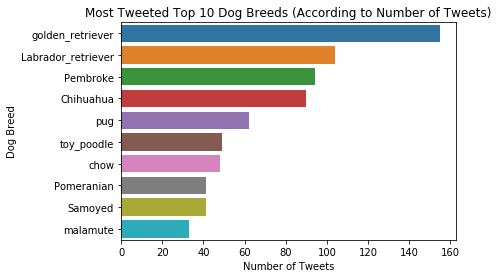

In [70]:
top_10_breeds_tweets = df.groupby(['dog_breed']).count()['tweet_id'].sort_values(ascending=False)[:10]
sns.barplot(y=top_10_breeds_tweets.index.values, x=top_10_breeds_tweets.values)
plt.title('Most Tweeted Top 10 Dog Breeds (According to Number of Tweets)')
plt.xlabel('Number of Tweets')
plt.ylabel('Dog Breed')
plt.show()

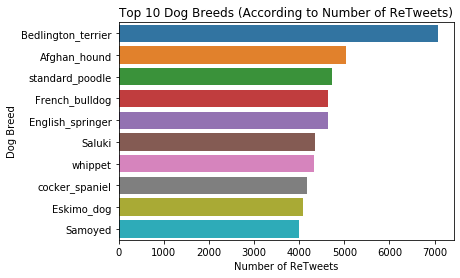

In [71]:
top_10_breeds_retweet = df.groupby('dog_breed').agg({'retweet_count':'mean'}).sort_values('retweet_count', ascending=False)[:10]['retweet_count']
sns.barplot(y=top_10_breeds_retweet.index.values, x=top_10_breeds_retweet.values)
plt.title('Top 10 Dog Breeds (According to Number of ReTweets)')
plt.xlabel('Number of ReTweets')
plt.ylabel('Dog Breed')
plt.show()

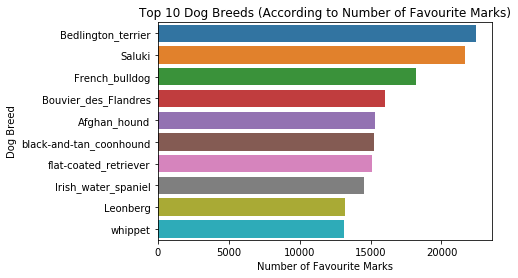

In [72]:
top_10_breeds_retweet = df.groupby('dog_breed').agg({'favourite_count':'mean'}).sort_values('favourite_count', ascending=False)[:10]['favourite_count']
sns.barplot(y=top_10_breeds_retweet.index.values, x=top_10_breeds_retweet.values)
plt.title('Top 10 Dog Breeds (According to Number of Favourite Marks)')
plt.xlabel('Number of Favourite Marks')
plt.ylabel('Dog Breed')
plt.show()

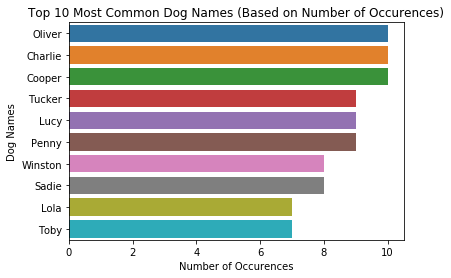

In [73]:
top_10_common_names = df['name'].value_counts()[:10]
sns.barplot(y=top_10_common_names.index.values, x=top_10_common_names.values)
plt.title('Top 10 Most Common Dog Names (Based on Number of Occurences)')
plt.xlabel('Number of Occurences')
plt.ylabel('Dog Names')
plt.show()

In [74]:
# Adding A Column Rating, To Calculate Actual Rating
df['rating'] = df['rating_numerator']/df['rating_denominator']
df.groupby('dog_breed').agg({'rating':'mean'}).sort_values('rating', ascending=False)

,rating
dog_breed,
clumber,2.700000
Bouvier_des_Flandres,1.300000
Pomeranian,1.253659
Saluki,1.250000
briard,1.233333
...,...
Ibizan_hound,0.925000
Walker_hound,0.900000
Scotch_terrier,0.900000


- **Highest** Rated Dog Breed : **Clumber**
- **Lowest** Rated Dog Breed : **Japanese Spaniel**

In [75]:
# Retreiving Image from Tweet For Lowest Rated Dog Breed
js_image_url = df[df['dog_breed'] == 'Japanese_spaniel'].head(1)['jpg_url'].values.tolist()[0]
r = requests.get(js_image_url)
i = Image.open(BytesIO(r.content))
i.save('japanese_spaniel.jpg')

In [76]:
# Retreiving Image from Tweet For Highest Rated Dog Breed
clumber_image_url = df[df['dog_breed'] == 'clumber'].head(1)['jpg_url'].values.tolist()[0]
r = requests.get(clumber_image_url)
i = Image.open(BytesIO(r.content))
i.save('clumber.jpg')